In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis=1)
test = pd.read_csv('cs-test.csv').drop('Unnamed: 0', axis=1)
sample_entry = pd.read_csv('sampleEntry.csv')

In [29]:
def missing_data(data):
    return (round(data.isnull().sum()/data.shape[0]*100,2))

In [30]:
print(missing_data(train))

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.62
dtype: float64


In [31]:
train[train.NumberOfDependents.isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [32]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [33]:
test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [34]:
sample_entry

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [35]:
train['SeriousDlqin2yrs'].value_counts()
train.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median').fit(train[['MonthlyIncome']])

monthly_income_na = train['MonthlyIncome'].isna()

train['MonthlyIncome'] = imputer.transform(train[['MonthlyIncome']])

train.loc[monthly_income_na, 'DebtRatio'] = (
    train.loc[monthly_income_na, 'DebtRatio'] / train.loc[monthly_income_na, 'MonthlyIncome']
)

<Axes: >

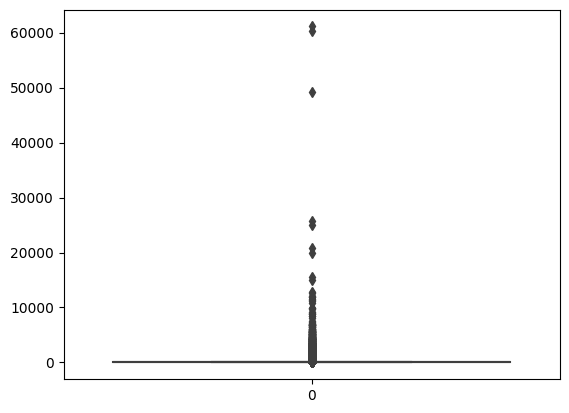

In [37]:
sns.boxplot(train['DebtRatio'])

In [38]:
def remove_outliers(data,column_name,iqr_factor=2):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_factor*iqr
    upper_bound = q3 + iqr_factor*iqr
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

train = remove_outliers(train,'DebtRatio')

<Axes: >

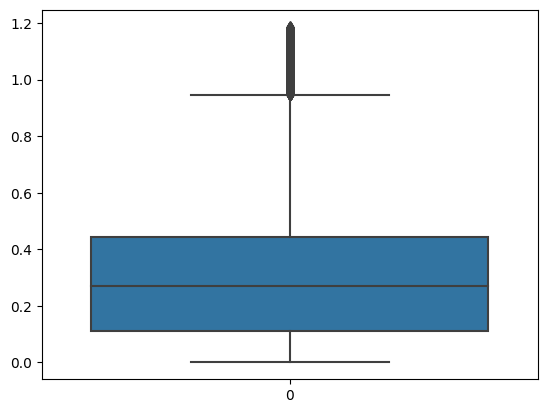

In [39]:
sns.boxplot(train['DebtRatio'])

<Axes: >

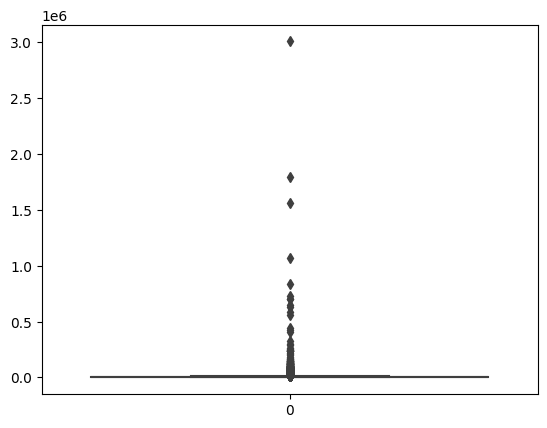

In [40]:
sns.boxplot(train['MonthlyIncome']) 

In [41]:
train = remove_outliers(train,'MonthlyIncome')

<Axes: >

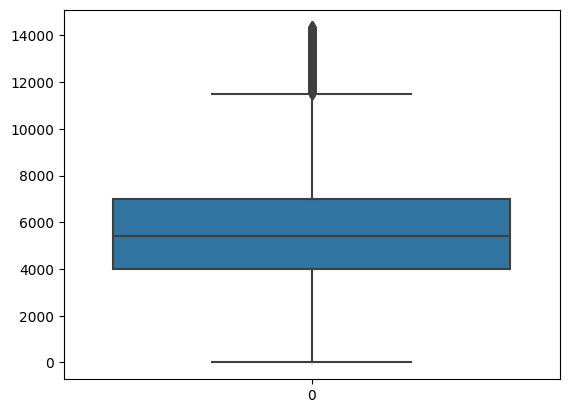

In [42]:
sns.boxplot(train['MonthlyIncome'])

In [44]:
independent_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
                    'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                    'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                    'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                    'NumberOfDependents']
dependent_col = 'SeriousDlqin2yrs'

In [45]:
train[independent_cols].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,137498.000000,137498.000000,137498.000000,137498.000000,137498.000000,137498.000000,137498.000000,137498.000000,137498.000000,133606.000000
mean,5.301834,52.276339,0.431854,0.309981,5756.275895,8.232927,0.283902,0.937897,0.255975,0.732235
std,205.014807,14.963570,4.364566,0.248719,2707.198891,5.009036,4.344314,0.982552,4.330248,1.097915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029004,41.000000,0.000000,0.110741,4000.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.151177,52.000000,0.000000,0.273647,5400.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559698,63.000000,0.000000,0.450454,7000.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,29110.000000,109.000000,98.000000,1.187593,14383.000000,57.000000,98.000000,17.000000,98.000000,20.000000


In [46]:
train[independent_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3892
dtype: int64

In [48]:
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')
random.seed(4)

In [49]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical", numeric_preprocessor, independent_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['RevolvingUtilizationOfUnsecuredLines', 'age',
                                  'NumberOfTime30-59DaysPastDueNotWorse',
                                  'DebtRatio', 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans',
                                  'NumberOfTimes90DaysLate',
                                  'NumberRealEstateLoansOrLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse',
                                  'NumberOfDependents'])])

In [50]:
df_sample = train.sample(5000, random_state=4)
X = df_sample[independent_cols]
y = df_sample[dependent_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [51]:
X_train.head(), y_train.head()

(        RevolvingUtilizationOfUnsecuredLines  age  \
 38563                               0.588841   54   
 96114                               1.000000   78   
 65120                               0.197093   51   
 91476                               0.026304   67   
 124517                              0.874285   69   
 
         NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
 38563                                      1   0.451424         8038.0   
 96114                                      1   0.009464          633.0   
 65120                                      0   0.320926         5400.0   
 91476                                      0   0.395429         5775.0   
 124517                                     0   0.661548         3255.0   
 
         NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
 38563                                10                        0   
 96114                                 2                        0   
 65120         

In [52]:
rf = RandomForestClassifier(random_state=4)
lr = LogisticRegression(random_state=4)
models = [rf, lr]

In [54]:
all_pipelines = {}

for model in models:
    all_pipelines[model] = pipeline = make_pipeline(preprocessor, model)
    cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=4, scoring='roc_auc')
    print(model)
    print(f"Cross-validation scores: {cross_val_scores}")
    print(f"Mean CV score: {cross_val_scores.mean()}\n")

RandomForestClassifier(random_state=4)
Cross-validation scores: [0.83415238 0.82610794 0.85730144 0.8602742 ]
Mean CV score: 0.8444589883510811

LogisticRegression(random_state=4)
Cross-validation scores: [0.81396825 0.81085714 0.79741358 0.83421554]
Mean CV score: 0.8141136293227509



In [55]:
all_pipelines[rf].fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=4))])

In [56]:
from sklearn.metrics import roc_auc_score

y_pred = all_pipelines[rf].predict_proba(X_test)[:, 1]
print(f"Test ROC AUC score: {roc_auc_score(y_test, y_pred)}")

Test ROC AUC score: 0.8480083857442348


In [57]:
all_pipelines[rf].fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=4))])

In [58]:
test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [59]:
has_monthly_income_na = test['MonthlyIncome'].isna()
test['MonthlyIncome'] = imputer.transform(test[['MonthlyIncome']])
test.loc[has_monthly_income_na, 'DebtRatio'] = (
    test.loc[has_monthly_income_na, 'DebtRatio'] / test.loc[has_monthly_income_na, 'MonthlyIncome']
)

In [60]:
test.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [61]:
test[dependent_col] = all_pipelines[rf].predict_proba(test)[:, 1]

In [62]:
test['SeriousDlqin2yrs'].value_counts(normalize=True)

0.000000    0.317971
0.010000    0.137060
0.020000    0.076382
0.030000    0.052639
0.040000    0.036482
              ...   
0.290227    0.000020
0.940000    0.000020
0.070227    0.000010
0.450227    0.000010
0.320227    0.000010
Name: SeriousDlqin2yrs, Length: 139, dtype: float64

In [63]:
sample_entry

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [64]:
sample_entry['Probability'] = all_pipelines[rf].predict_proba(test)[:, 1]

In [65]:
sample_entry.to_csv('submission.csv', index=False)